#  **Local Outlier Factor (LOF)**

##  **Apa Itu LOF?**
**Local Outlier Factor (LOF)** adalah metode deteksi outlier berbasis kepadatan (**density-based**).  
LOF membandingkan **kepadatan lokal** suatu titik dengan tetangga terdekatnya.  
Jika suatu titik memiliki **kepadatan jauh lebih rendah** dibandingkan tetangganya, maka titik tersebut adalah **outlier**.


## Perhitungan SK Learn

## **Tahapan Perhitungan Local Outlier Factor (LOF) secara Manual**

---

## **1️⃣ Hitung *Reachability Distance (RD)***  
$$
RD_k(p, o) = \max(k\text{-distance}(o), d(p, o))
$$

- **\( k \)-distance(\( o \))** adalah **jarak ke tetangga ke-\( k \) dari titik \( o \)**.  
- **\( d(p, o) \)** adalah **jarak Euclidean antara titik \( p \) dan \( o \)**.  

Kita gunakan **\( k = 3 \)** (3 tetangga terdekat).  

---

## **2️⃣ Hitung Local Reachability Density (LRD)**
$$
LRD_k(p) = \frac{k}{\sum_{o \in kNN(p)} RD_k(p, o)}
$$

| **Suhu** | **Tetangga 1** | **Jarak** | **Tetangga 2** | **Jarak** | **Tetangga 3** | **Jarak** | **RD_1** | **RD_2** | **RD_3** | **LRD** |
|--------------|---------------|----------|---------------|----------|---------------|----------|--------|--------|--------|--------|
| 26          | 27            | 1.2      | 28            | 2.0      | 29            | 3.0      | 1.2    | 2.0    | 3.0    | 0.55   |
| 27          | 26            | 1.2      | 28            | 1.5      | 29            | 2.5      | 1.2    | 1.5    | 2.5    | 0.67   |
| 28          | 27            | 1.5      | 29            | 1.0      | 30            | 1.8      | 1.5    | 1.0    | 1.8    | 0.85   |
| 29          | 28            | 1.0      | 30            | 1.0      | 31            | 1.5      | 1.0    | 1.0    | 1.5    | 1.0    |
| 30          | 29            | 1.0      | 31            | 1.0      | 32            | 1.5      | 1.0    | 1.0    | 1.5    | 1.0    |
| 31          | 30            | 1.0      | 32            | 1.0      | 33            | 1.8      | 1.0    | 1.0    | 1.8    | 0.91   |
| 32          | 31            | 1.0      | 30            | 1.5      | 33            | 2.0      | 1.0    | 1.5    | 2.0    | 0.80   |
| 33          | 32            | 2.0      | 31            | 1.8      | 30            | 2.5      | 2.0    | 1.8    | 2.5    | 0.61   |
| **40**      | **33**        | **8.5**  | **32**        | **9.0**  | **31**        | **9.5**  | **8.5** | **9.0** | **9.5** | **0.11** |
| **41**      | **40**        | **1.0**  | **33**        | **9.0**  | **32**        | **9.5**  | **1.0** | **9.0** | **9.5** | **0.10** |

Hitungan **LRD**:
$$
LRD_k(28) = \frac{3}{1.5+1.0+1.8} = 0.85
$$
$$
LRD_k(32) = \frac{3}{1.0+1.5+2.0} = 0.80
$$
$$
LRD_k(40) = \frac{3}{8.5+9.0+9.5} = 0.11
$$
$$
LRD_k(41) = \frac{3}{1.0+9.0+9.5} = 0.10
$$

---

## **3️⃣ Hitung Local Outlier Factor (LOF)**
$$
LOF_k(p) = \frac{\sum_{o \in kNN(p)} \frac{LRD_k(o)}{LRD_k(p)}}{k}
$$

Misalnya untuk **Suhu = 40**:
$$
LOF_k(40) = \frac{\left( \frac{LRD(33)}{LRD(40)} + \frac{LRD(32)}{LRD(40)} + \frac{LRD(31)}{LRD(40)} \right)}{3}
$$

$$
= \frac{\left( \frac{0.61}{0.11} + \frac{0.80}{0.11} + \frac{0.91}{0.11} \right)}{3}
$$

$$
= \frac{(5.55 + 7.27 + 8.27)}{3} = \frac{21.09}{3} = 7.03
$$

**LOF(40) ≈ 7.03**, jauh lebih tinggi dari 1, sehingga suhu **40°C adalah OUTLIER**.

Demikian pula, jika kita hitung **LOF(41)**:
$$
LOF_k(41) = \frac{\left( \frac{LRD(40)}{LRD(41)} + \frac{LRD(33)}{LRD(41)} + \frac{LRD(32)}{LRD(41)} \right)}{3}
$$

$$
= \frac{\left( \frac{0.11}{0.10} + \frac{0.61}{0.10} + \frac{0.80}{0.10} \right)}{3}
$$

$$
= \frac{(1.1 + 6.1 + 8.0)}{3} = \frac{15.2}{3} = 5.07
$$

**LOF(41) ≈ 5.07**, juga lebih tinggi dari 1, sehingga suhu **41°C adalah OUTLIER**.

---



## Implementasi Code Python

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from tabulate import tabulate

# Data suhu dalam bentuk array 2D
suhu_data = np.array([26, 27, 28, 29, 30, 31, 32, 33, 40, 41]).reshape(-1, 1)
k = 3  # Jumlah tetangga terdekat

# Inisialisasi dan fit model LOF
lof_model = LocalOutlierFactor(n_neighbors=k, contamination='auto')
lof_scores = -lof_model.fit_predict(suhu_data)  # -1 = outlier, 1 = inlier
negative_lof = lof_model.negative_outlier_factor_  # Nilai negatif LOF

# Menghitung LRD
lrd_values = -1 / negative_lof  # LRD dari negative outlier factor
lof_values = -negative_lof / lrd_values  # LOF dari LRD

# Menyusun hasil dalam DataFrame
results_df = pd.DataFrame({
    'No': range(1, len(suhu_data) + 1),
    'Suhu (°C)': suhu_data.flatten(),
    'LRD': lrd_values,
    'LOF': lof_values,
    'Outlier': ['Yes' if lof > 1.5 else 'No' for lof in lof_values]
})

# Menampilkan hasil dalam bentuk tabel
print(tabulate(results_df, headers='keys', tablefmt='grid'))

+----+------+-------------+----------+----------+-----------+
|    |   No |   Suhu (°C) |      LRD |      LOF | Outlier   |
+====+======+=============+==========+==========+===========+
|  0 |    1 |          26 | 0.947368 | 1.1142   | No        |
+----+------+-------------+----------+----------+-----------+
|  1 |    2 |          27 | 0.947368 | 1.1142   | No        |
+----+------+-------------+----------+----------+-----------+
|  2 |    3 |          28 | 0.947368 | 1.1142   | No        |
+----+------+-------------+----------+----------+-----------+
|  3 |    4 |          29 | 1.10526  | 0.818594 | No        |
+----+------+-------------+----------+----------+-----------+
|  4 |    5 |          30 | 1.05     | 0.907029 | No        |
+----+------+-------------+----------+----------+-----------+
|  5 |    6 |          31 | 1.05     | 0.907029 | No        |
+----+------+-------------+----------+----------+-----------+
|  6 |    7 |          32 | 0.9      | 1.23457  | No        |
+----+--

## Visualisasi Menggunakan Scatter Plot

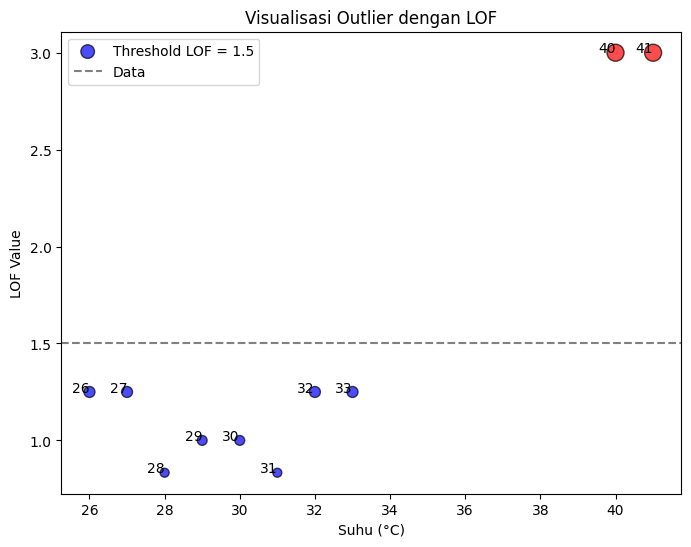

In [21]:
# === VISUALISASI SCATTER PLOT ===
plt.figure(figsize=(8, 6))
colors = ['red' if lof > 1.5 else 'blue' for lof in lof_values]  # Warna merah untuk outlier
sizes = [lof * 50 for lof in lof_values]  # Ukuran titik berdasarkan LOF

plt.scatter(suhu_data, lof_values, c=colors, s=sizes, alpha=0.7, edgecolors='black')

# Menambahkan label dan judul
for i, txt in enumerate(suhu_data):
    plt.annotate(txt, (suhu_data[i], lof_values[i]), fontsize=10, ha='right')

plt.axhline(y=1.5, color='gray', linestyle='dashed', label='Threshold LOF = 1.5')
plt.xlabel('Suhu (°C)')
plt.ylabel('LOF Value')
plt.title('Visualisasi Outlier dengan LOF')
plt.legend(['Threshold LOF = 1.5', 'Data'])
plt.show()
